# importing libraries

In [4]:
import re
import nltk
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocessing

In [5]:
# remove useless text from the data
def remove_useless_text(text):
    text = re.sub(r'\n_CHAPTER *[A-Z]*[A-Z]._|\nCHAPTER *[A-Z]*[A-Z].|\n_([\s\S]*?)_|\n([\s\S]*?)\*\*\* START OF THE PROJECT ([\s\S]*?)\*\*\*', ' ', text)
    text = re.sub(r'\n\*\*\* END OF THE PROJECT ([\s\S]*)',' ',text)
    return text



In [6]:
# reading text from the book and told
with open('pg66677.txt', 'r',encoding='utf-8') as f:
    text_book1 = ''.join(f.readlines())
    
with open('pg66678.txt', 'r',encoding='utf-8') as f:
    text_book2 = ''.join(f.readlines())
    

In [7]:
text_book1 = remove_useless_text(text_book1)
text_book2= remove_useless_text(text_book2)


In [8]:
# converting all text to lower case and removing any link
def to_lower(text):
    text = text.lower()
    re.sub(r"http\S+", "", text)
    return text

In [9]:
text_book1 = to_lower(text_book1)
text_book2=to_lower(text_book2)

In [10]:
#converting short forms to full forms
def conversion(text):
    
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [11]:
text_book1 = conversion(text_book1)
text_book2= conversion(text_book2)

In [12]:
# removing all the puntuations from the text
def remove_punctuations(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    return text

In [13]:
text_book1= remove_punctuations(text_book1)
text_book2=remove_punctuations(text_book2)

# Tokenization

In [14]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# splitting text into words
def tokonize_word(text):
    words = word_tokenize(text)
    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
words_book1 = tokonize_word(text_book1)
words_book2 = tokonize_word(text_book2)

# Frequency analysis

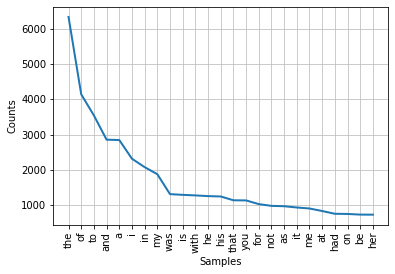

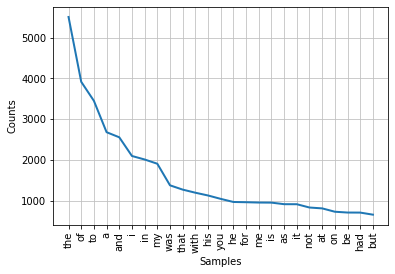

In [16]:
# analyzing the the frequency of words
data_analysis_book1 = nltk.FreqDist(words_book1)
data_analysis_book1.plot(25, cumulative=False)
data_analysis_book2 = nltk.FreqDist(words_book2)
data_analysis_book2.plot(25, cumulative=False)


# Word Cloud

In [17]:
def listToString(s):       
    str1 = " "      
    return (str1.join(s))
        
# converting list to string 
def list_to_string(words):       
    text = listToString(words)
    return text 

In [18]:
text_book1 = list_to_string(words_book1)
text_book2 = list_to_string(words_book2)

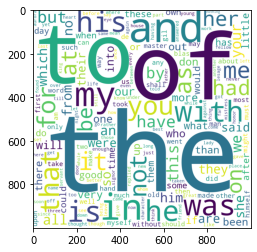

In [19]:
# creating word cloud for book 1
wc_1 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_book1)
plt.imshow(wc_1)

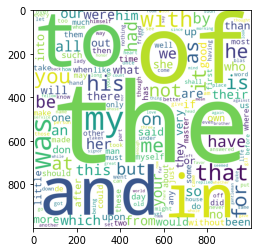

In [20]:
# creating word cloud for book 2
wc_2 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_book2)
plt.imshow(wc_2)

# StopWords

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# removing the stopwords
def remove_stopwords(words):
    words = [w for w in words if w not in stopwords.words("english")]
    return words

In [23]:
words_book1 = remove_stopwords(words_book1)
words_book2 =remove_stopwords(words_book2)

# WordCloud

In [24]:
text_book1 = list_to_string(words_book1)
text_book2 = list_to_string(words_book2)

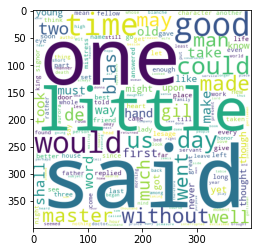

In [25]:
# calculating word cloud for book1
wc_1 = WordCloud(background_color="white", width=400, height=400, random_state=1,stopwords= [],collocations=False).generate(text_book1)
plt.imshow(wc_1)

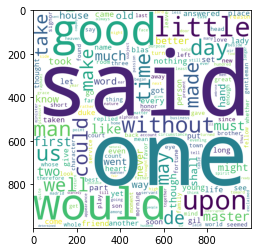

In [26]:
# calculating word cloud for book2
wc_2 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_book2)
plt.imshow(wc_2)

# Frequency distribution

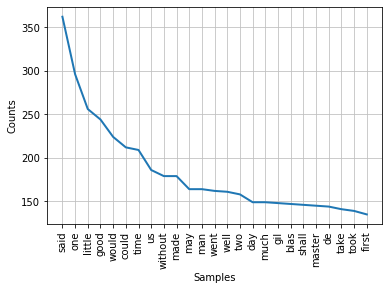

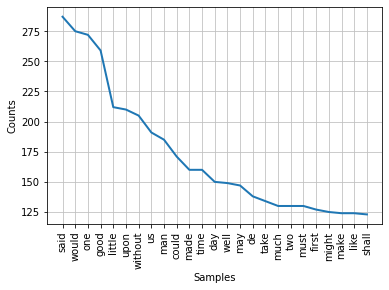

In [27]:
# analyzing frequency for book1 and book 2 respectively
data_analysis_book1 = nltk.FreqDist(words_book1)
data_analysis_book1.plot(25, cumulative=False)

data_analysis_book2 = nltk.FreqDist(words_book2)
data_analysis_book2.plot(25, cumulative=False)


# wordlength to frequency calculation

In [28]:
def wordlength_to_frequency(words):
    frequencyarr = []
    lengtharr=[]
    frequencyarr.clear()
    lengtharr.clear()
    y=0
    x=0
    # finding the largest word in list
    res = max(words, key = len)
    #print(res)
    i=0
    fre=0
    #print(len(res))
    # calculating the the frequency of words with different length
    while(i<=len(res)):
        for word in words:
            if(len(word)==i):
                fre= fre+1
        print(i,"-",fre)
        frequencyarr.append(fre)
        lengtharr.append(i)
        fre=0
        i=i+1

    # plotting the line graph using the values calculated
    y = np.array(frequencyarr)
    x = np.array(lengtharr)
    plt.plot(x, y)
    new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
    plt.xticks(new_list)
    plt.xlabel("Length of word")
    plt.ylabel("frequency of occurence")
    plt.title("word length to frequency of occurence")
    plt.show()





0 - 0
1 - 34
2 - 565
3 - 3781
4 - 9805
5 - 8685
6 - 8245
7 - 7231
8 - 5295
9 - 3678
10 - 2435
11 - 1158
12 - 672
13 - 306
14 - 92
15 - 18
16 - 4
17 - 1


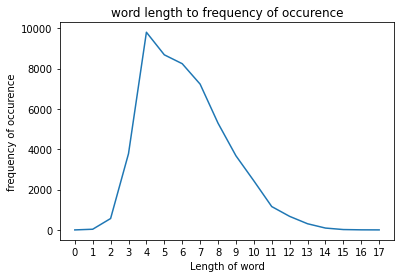

In [29]:
wordlength_to_frequency(words_book1)


0 - 0
1 - 20
2 - 468
3 - 3228
4 - 8867
5 - 7746
6 - 7271
7 - 6813
8 - 4672
9 - 3720
10 - 2191
11 - 1252
12 - 630
13 - 289
14 - 91
15 - 35
16 - 6
17 - 3


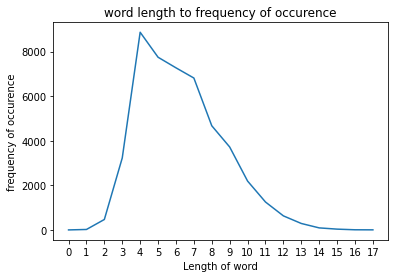

In [30]:
wordlength_to_frequency(words_book2)

# POS tagging

In [31]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [32]:
# POS tagging the words
result1=nltk.pos_tag(words_book1)

In [33]:
result2=nltk.pos_tag(words_book2)

In [34]:
from collections import Counter
def get_counts(tags):
  counts = Counter( tag for word,  tag in tags)
  return counts

In [69]:
def FrequencyPlot(distribution):
  #plt.rcParams["figure.autolayout"] = True
  plt.rcParams["figure.figsize"] = [15, 3.50]
  plt.bar(distribution.keys(),distribution.values())
  plt.show()


Number of tags used in T1= 31


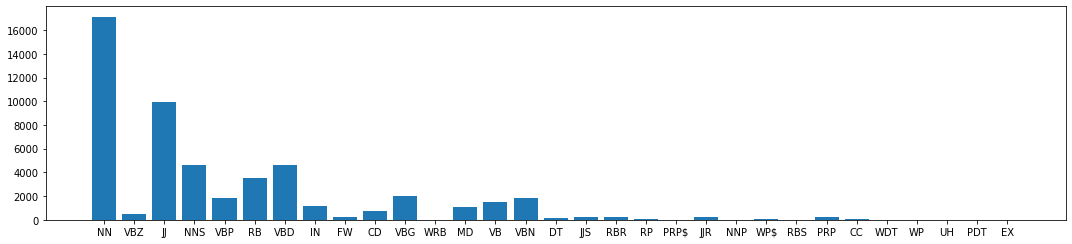

In [71]:
distribution1=get_counts(result1)
print("Number of tags used in T1=",len(distribution1))
distribution1
FrequencyPlot(distribution1)

Number of tags used in T2= 29


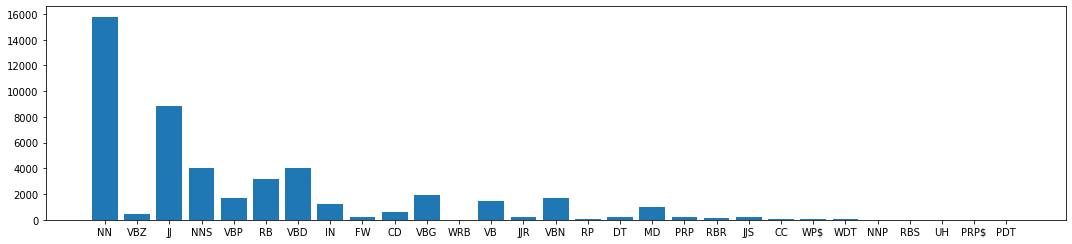

In [72]:
distribution2=get_counts(result2)
print("Number of tags used in T2=",len(distribution2))
distribution2
FrequencyPlot(distribution2)